Name: PAVAN KUMAR 
Batch Id: AUG 4th 2023
Topic: Data Pre-Processing

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\1pava\Documents\360digitmg\EDA\DATA SETS\Boston.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [4]:
df['chas'].nunique()

2

In [5]:
df['chas'].unique()

array([0., 1.])

In [6]:
df['chas'] = df['chas'].astype('int32')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int32  
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(13), int32(1)
memory usage: 42.7 KB


In [8]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [9]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [10]:
df.duplicated().sum()

0

In [11]:
# IQR METHOD
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

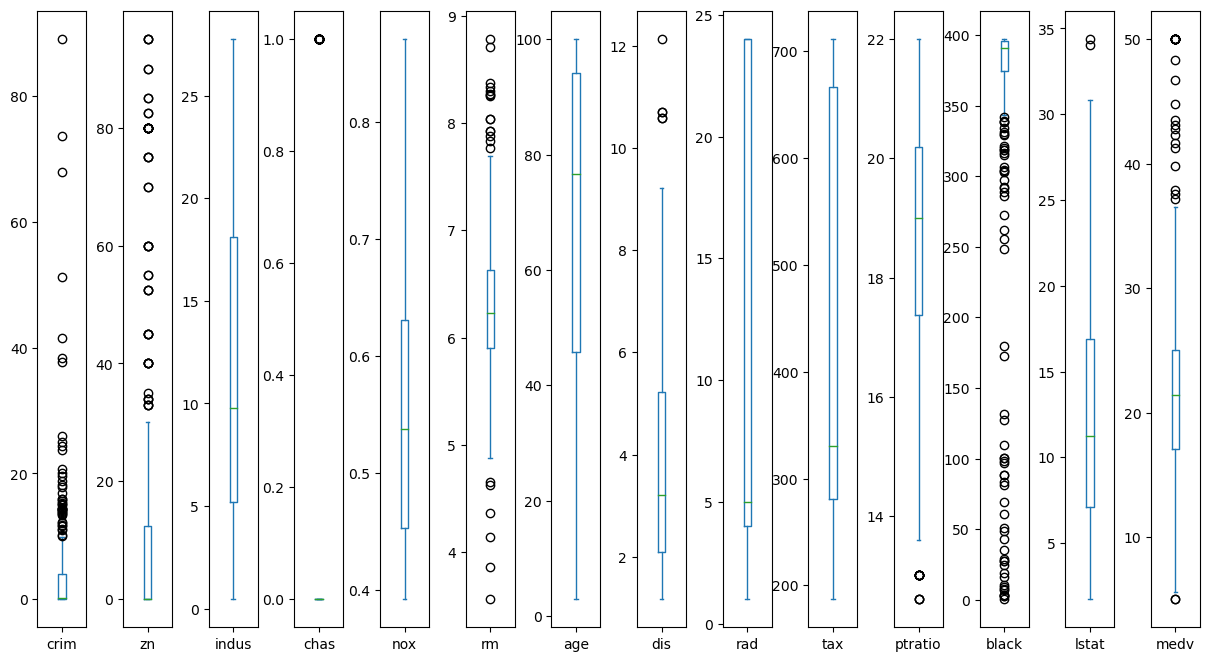

In [12]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (15, 8))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [13]:
#from the above diagram we can see that there is no outliers in indus, nox, age, rad and tax
#the chas column is not considered because it is a categorcal data which help only as 0's and 1's
#from the above diagram we can see that the outliers are present in 7 columns 

In [14]:
#outlier treatment on the 7 individual columns

In [15]:
#1.crim

In [16]:
IQR = df['crim'].quantile(0.75) - df['crim'].quantile(0.25)
lower_limit = df['crim'].quantile(0.25)-(IQR*1.5)
upper_limit = df['crim'].quantile(0.75)+(IQR*1.5)
outliers_df = np.where(df['crim'] > upper_limit, True,
                       np.where(df['crim'] < lower_limit, True, False))
df_trimmed = df.loc[~(outliers_df),]
print(df.shape)
print(df_trimmed.shape)

(404, 14)
(362, 14)


In [17]:
df['crim']= pd.DataFrame(np.where(df['crim'] > upper_limit, upper_limit,
                                         np.where(df['crim'] < lower_limit, lower_limit,
                                                  df['crim'])))

In [18]:
df['crim'].shape

(404,)

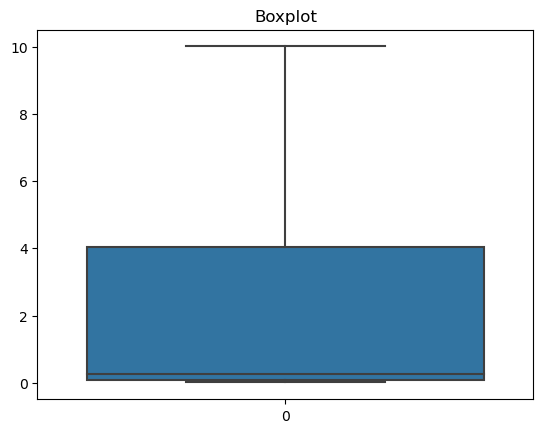

In [19]:
sns.boxplot(df.crim);plt.title('Boxplot');plt.show()


(404,)


<Axes: >

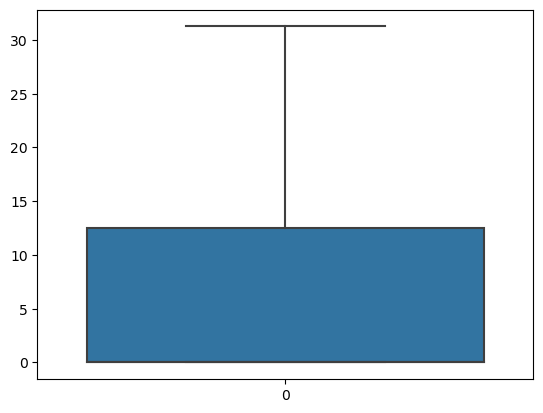

In [20]:
#2. outlier treatment on zn column

# Defining upper and lower limits
IQR = df['zn'].quantile(0.75) - df['zn'].quantile(0.25)
lower_limit = df['zn'].quantile(0.25)-(IQR*1.5)
upper_limit = df['zn'].quantile(0.75)+(IQR*1.5)


# Replacing outliers with upper and lower limits
df['zn'] = np.where(df['zn'] > upper_limit, upper_limit, 
                    np.where(df['zn'] < lower_limit, lower_limit, df['zn']))

print(df['zn'].shape)
sns.boxplot(df['zn'])


<Axes: >

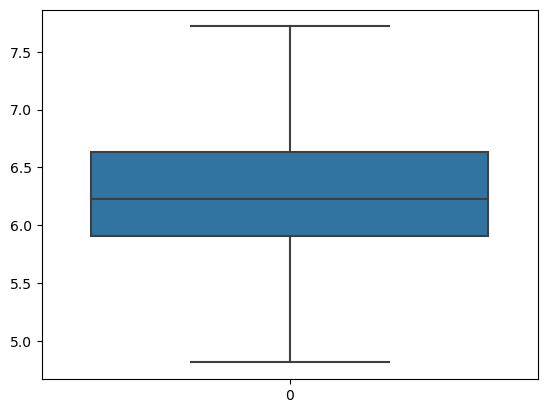

In [21]:
#3. outlier treatment on rm column
from feature_engine.outliers.winsorizer import Winsorizer
winsorizer = Winsorizer(capping_method= 'iqr', 
                        tail= "both", fold= 1.5, variables= ['rm'])
df['rm'] = winsorizer.fit_transform(df[['rm']])
sns.boxplot(df['rm'])

<Axes: >

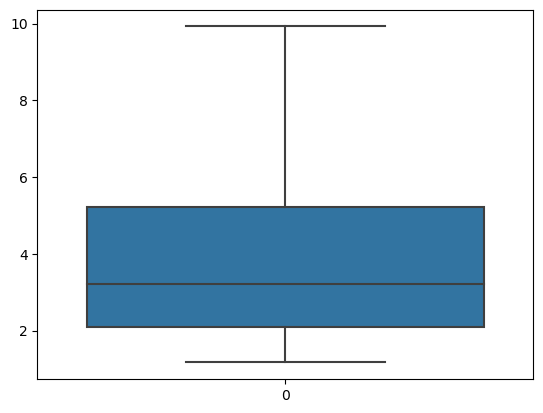

In [22]:
#4 outlier treatment on dis column
# Defining upper and lower limits
IQR = df['dis'].quantile(0.75) - df['dis'].quantile(0.25)
lower_limit = df['dis'].quantile(0.25)-(IQR*1.5)
upper_limit = df['dis'].quantile(0.75)+(IQR*1.5)

# Replacing outliers with upper and lower limits
df['dis'] = np.where(df['dis'] > upper_limit, upper_limit,
                    np.where(df['dis'] < lower_limit, lower_limit, df['dis']))
sns.boxplot(df['dis'])

In [23]:
# 5) outlier treatment on black column

# Calculate the IQR
Q1 = df['black'].quantile(0.25)
Q3 = df['black'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['black'] < lower_bound) | (df['black'] > upper_bound)]

# Replace outliers with appropriate values or remove them
# For example, you can replace them with the lower or upper bound
df.loc[df['black'] < lower_bound, 'black'] = lower_bound
df.loc[df['black'] > upper_bound, 'black'] = upper_bound


(404,)

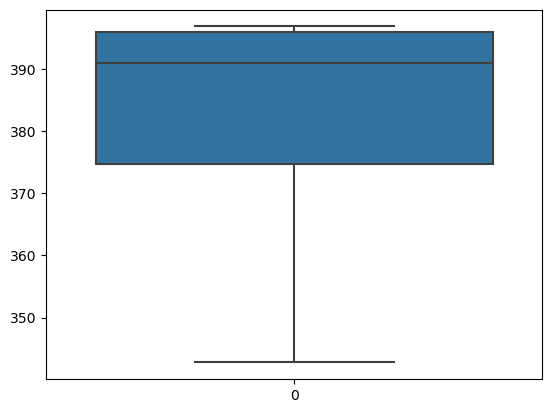

In [24]:
sns.boxplot(df['black'])
df['black'].shape

<Axes: >

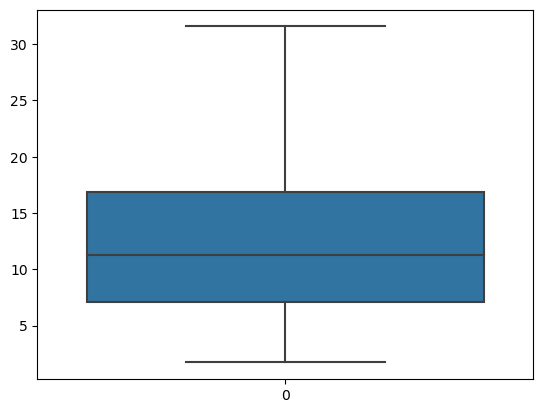

In [25]:
#6 outlier treatment on lstat column
# Defining upper and lower limits
IQR = df['lstat'].quantile(0.75) - df['lstat'].quantile(0.25)
lower_limit = df['lstat'].quantile(0.25)-(IQR*1.5)
upper_limit = df['lstat'].quantile(0.75)+(IQR*1.5)

# Replacing outliers with upper and lower limits
df['lstat'] = np.where(df['lstat'] > upper_limit, upper_limit,
                    np.where(df['lstat'] < lower_limit, lower_limit, df['lstat']))
sns.boxplot(df['lstat'])

<Axes: >

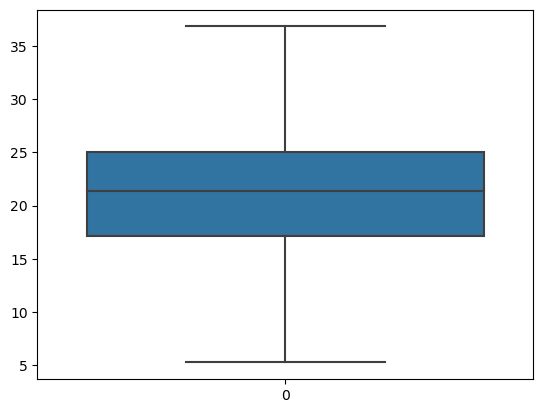

In [26]:
#7 outlier treatment on medv column
# Defining upper and lower limits
IQR = df['medv'].quantile(0.75) - df['medv'].quantile(0.25)
lower_limit = df['medv'].quantile(0.25)-(IQR*1.5)
upper_limit = df['medv'].quantile(0.75)+(IQR*1.5)

# Replacing outliers with upper and lower limits
df['medv'] = np.where(df['medv'] > upper_limit, upper_limit,
                    np.where(df['medv'] < lower_limit, lower_limit, df['medv']))
sns.boxplot(df['medv'])

crim          Axes(0.125,0.11;0.0466867x0.77)
zn         Axes(0.181024,0.11;0.0466867x0.77)
indus      Axes(0.237048,0.11;0.0466867x0.77)
chas       Axes(0.293072,0.11;0.0466867x0.77)
nox        Axes(0.349096,0.11;0.0466867x0.77)
rm          Axes(0.40512,0.11;0.0466867x0.77)
age        Axes(0.461145,0.11;0.0466867x0.77)
dis        Axes(0.517169,0.11;0.0466867x0.77)
rad        Axes(0.573193,0.11;0.0466867x0.77)
tax        Axes(0.629217,0.11;0.0466867x0.77)
ptratio    Axes(0.685241,0.11;0.0466867x0.77)
black      Axes(0.741265,0.11;0.0466867x0.77)
lstat      Axes(0.797289,0.11;0.0466867x0.77)
medv       Axes(0.853313,0.11;0.0466867x0.77)
dtype: object

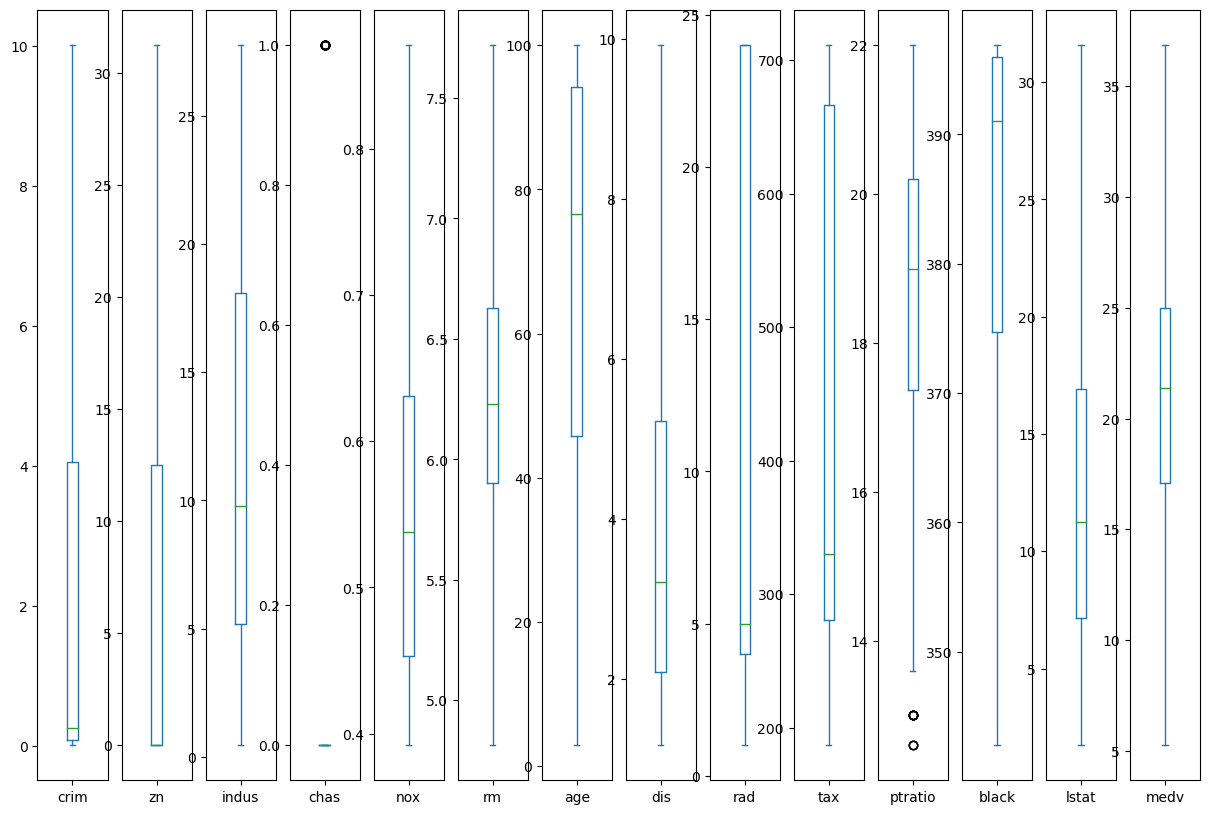

In [28]:
df.plot(kind= "box",subplots= True, sharey= False, figsize= (15,10))

### hence all outliers are treated